## Grant Aguinaldo, HW-5 Submission

### Analysis

Based on this preliminary analysis three observations have been made.

**First.** Most rides on the Pyber platform are in urban areas, followed by suburban and rural areas. One possible, and probably the most obvious reason for this is population, in that folks living in urban areas are more likely to use a ride-sharing platform like Pyber, and this has been observed by the Pew Research Center (see [On-demand: Ride-hailing apps](http://www.pewinternet.org/2016/05/19/on-demand-ride-hailing-apps/#fn-15814-2)). In addition, the data shows that there is more than a 10-fold difference in the amount of riders in urban areas compared to rural areas.

**Second.** Based on the general direction of the clustering, there seems to be a negative relationship between the average fare per city and the total number of riders per city.  One reason for this is purely based on supply-and-demand principles since more drivers and riders on the platform is expected to bring down the overall cost of a ride. There seems to be an estimated 20% increase in the average fare when comparing suburban and urban areas.  In addition, there seems to be an estimated 40% increase between the fares in rural and urban areas. 

**Thrid.**  Another reason for the difference in fare in urban and rural areas could be the distance  of the ride. Longer distances in rural areas could also lead to an increase in the average fare, however, the data set does not have any data related to the distance that each rider went on each ride. 
 
***

In [1]:
#Standard Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
#Read in files and create dataframes.

#Read in rider data into a Pandas dataframe.
ride_file = '/Users/gta/dev/hw-5/ride_data.csv'
df_ride = pd.read_csv(ride_file)


#Read in city data into a Pandas dataframe.
city_file = '/Users/gta/dev/hw-5/city_data.csv'
df_city = pd.read_csv(city_file)

In [36]:
#Inspect head from dataframe.

df_city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
#Inspect head from dataframe.

df_ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
#Complete an outer join on 'city' to create one dataframe.

df_combined = pd.merge(df_ride, df_city, on='city', how='outer')
df_combined.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


### Data needed for bubble plots (Deliverable 1)

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [6]:
#Create dataframes based on type of city.

df_urban = df_combined[df_combined['type'] == 'Urban']
df_suburban = df_combined[df_combined['type'] == 'Suburban']
df_rural = df_combined[df_combined['type'] == 'Rural']

In [7]:
#Write function to process all data in dataframe and return the correct Pandas series

def scatter_data(c):
    total_rides_per_city = c.groupby('city').count()['date']
    average_fare_per_city = c.groupby('city').mean()['fare']
    total_drivers_per_city = c.groupby('city').mean()['driver_count']
    
    return total_drivers_per_city, total_rides_per_city, average_fare_per_city

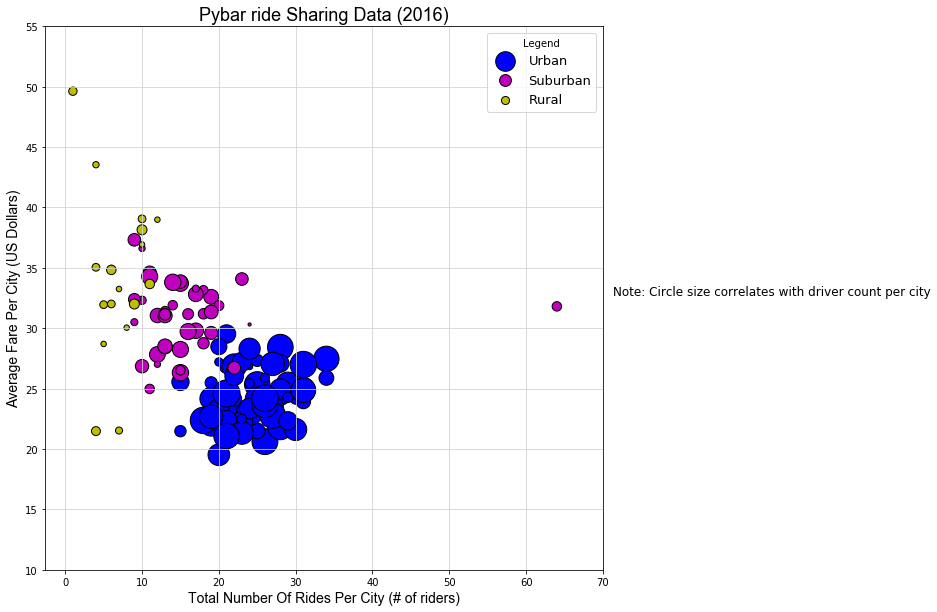

In [37]:
#Create scatter plot for the urban, suburban and rural data sets.

#Set plot size
plt.figure(figsize=(10,10))

#Set type of plot and name.

#Plot for urban data
Urban_Plot = plt.scatter(x = scatter_data(df_urban)[1], y = scatter_data(df_urban)[2], 
            s = [10 * num for num in scatter_data(df_urban)[0]],
            edgecolors='k', c='b')

#Plot for suburban data
Suburban_Plot = plt.scatter(x = scatter_data(df_suburban)[1], y = scatter_data(df_suburban)[2], 
            s = [10 * num for num in scatter_data(df_suburban)[0]], 
            edgecolors='k', c='m')

#Plot for rural data
Rural_Plot = plt.scatter(x = scatter_data(df_rural)[1], y = scatter_data(df_rural)[2], 
            s = [10 * num for num in scatter_data(df_rural)[0]],
           edgecolors='k', c='y')

#Set and define plot details
plt.xlabel('Total Number Of Rides Per City (# of riders)', fontname='Arial', fontsize=14)

plt.ylabel("Average Fare Per City (US Dollars)", fontname='Arial', fontsize=14)

plt.title("Pybar ride Sharing Data (2016)", fontname='Arial', fontsize=18)

plt.grid(color='lightgray')

plt.annotate('Note: Circle size correlates with driver count per city',
            xy=(1, 0.5), xytext=(10, 10), xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points', size=12)

plt.xticks(np.arange(0, 80, 10))

plt.yticks(np.arange(10, 60, 5))

plt.legend((Urban_Plot, Suburban_Plot, Rural_Plot),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           title='Legend',
           fontsize=13)

#Show plot
plt.show()

### Produce the following three pie charts (Deliverable 2)

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

In [9]:
df_city_type_driver_count = df_city.groupby('type', as_index=False).sum()
df_city_type_driver_count

,type,driver_count
0,Rural,104
1,Suburban,638
2,Urban,2607


In [10]:
df_city_type_rider_count = df_combined.groupby('type', as_index=False).ride_id.count()
df_city_type_rider_count

,type,ride_id
0,Rural,125
1,Suburban,657
2,Urban,1625


In [11]:
df_city_type_total_fare = df_combined.groupby('type', as_index=False).fare.sum()
df_city_type_total_fare

,type,fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


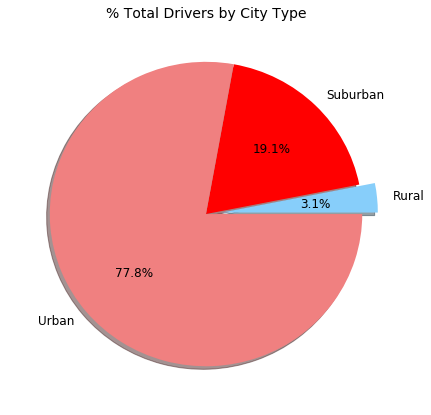

In [16]:
#Total drivers by city type.

plt.figure(figsize=(7,7))
explode = (0.1, 0, 0)
colors = ["lightskyblue", "red", "lightcoral"]

list_of_types = df_city_type_driver_count['type'].tolist()
num_of_drivers = df_city_type_driver_count['driver_count'].tolist()

plt.pie(num_of_drivers, explode=explode, 
        labels=list_of_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0, textprops={'fontsize':12})

plt.title('% Total Drivers by City Type', size=14)
plt.show()

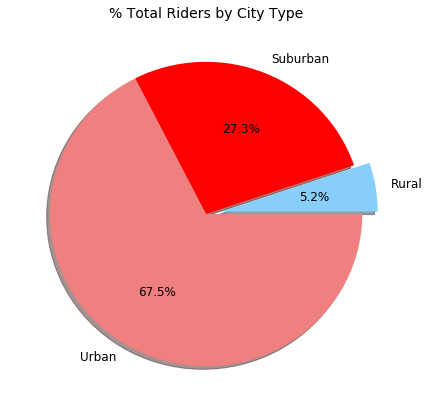

In [17]:
#Total riders by city type.

plt.figure(figsize=(7,7))
explode = (0.1, 0, 0)
colors = ["lightskyblue", "red", "lightcoral"]

list_of_types = df_city_type_driver_count['type'].tolist()
num_of_riders = df_city_type_rider_count['ride_id'].tolist()

plt.pie(num_of_riders, explode=explode, 
        labels=list_of_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0, textprops={'fontsize':12})

plt.title('% Total Riders by City Type', size=14)
plt.show()

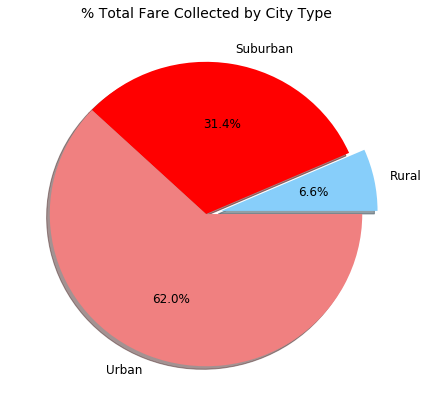

In [18]:
#Total Fare Collected by City Type

plt.figure(figsize=(7,7))
explode = (0.1, 0, 0)
colors = ["lightskyblue", "red", "lightcoral"]

list_of_types = df_city_type_total_fare['type'].tolist()
num_of_riders = df_city_type_total_fare['fare'].tolist()
df_urban 
plt.pie(num_of_riders, explode=explode, 
        labels=list_of_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0, textprops={'fontsize':12})

plt.title('% Total Fare Collected by City Type', size=14)
plt.show()